#             $$\text{Gnu Radio Companion with Machine Learning} $$

* ## Summary 
* [Creating signal dataset](*Creating-signal-and-noise-dataset-only-the-Real-values)
* [AutoCorrelation from Signal's](*AutoCorrelation-from-Signal's)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
noise = np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /sem_msg_3"), dtype=np.complex64)#NO MESSAGE
fm991 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /teste.dat"), dtype=np.complex64 ) 
fm889 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_88.9_a1"), dtype=np.complex64 ) 
fm932 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_93.9_a2"), dtype=np.complex64 ) 
plt.rcParams["font.size"] = 24
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

#plt.style.use("fivethirtyeight")

### $$\text{The dataset is refer to FM frequence of 99,1 signal and the noise of 105 Fm}$$
>* On this topic, we are going to separated the dataset between slices of 200000 rows each columns for both data, the noise one and the fm 99,1
* On the following , we have each autocorrelation , to understand how each dataframe is related and by that , we can make comparisson about those correlations
* Secondly , we apply the fourier on the both signal to notice spectrum for each and the distribution of frequence along with time
* Thirdly, we plot how distance each value find themselves from each dataset , noise and fm 99,1, to understand what metric of distance we are going to use, such as euclidean method or manhatan method

---

### $$\text{Supervising learning Knn and evaluations scores}$$

> Firstly , we are going to apply on two types from our dataset and make insight from it.



1.   Energy Frequence $=>$ By applying  $"np.abs(dataset(FFT))"$ we have the module of complex dtype and we have as result the energy from the amplitude. Thus, we going to follow the steps below using KNN .

2.  Complex dtype $=>$ Applying the KNN and other method tecniques on complex number slicing on the columns, as real number and imaginary .


>* Now that , we already understand the data by analysing autocorrelation, distribution along the time, how closely or far way each value are , we have to apply the algorithm machine learing K -nearest neighboors 
* Firstly , we slice the data on training and test, 70% and 30 % each, for our algorithm understand the pattern and learn what makes the data a signal with message and what's not.
*Secondly, we apply the KNN method, fit and prediction to score how accuracy our method was related to the original data.
* On this project, we using F1_Score, Precicion, MAE, RMSE, Recall, Score and Acurracy, as tools to metric the quality about our prediction. 
* After that, we have to improve our data and make sure the response by the metric tools was indeed correct, therefore we make sure by using Cross Validation with 10 , 15 or 20 folds, GridSearch to improving Knn method and RandomGridSearch to take the better method 
* On the final topic, we have an answer about the method by using confusion matrix and report classification 

In [ ]:
print('\n fmm91',fm991.shape)
print('\n noise', noise.shape)


 fmm91 (11698176,)

 noise (1867264,)


In [ ]:
pd.DataFrame(noise) # BEFORE FOURIER

,0
0,0.000159-0.000106j
1,0.000670-0.001249j
2,0.002546+0.002546j
3,-0.000984-0.002860j
4,-0.003125+0.002281j
...,...
1867259,-0.003125+0.002281j
1867260,-0.001249-0.001249j
1867261,0.000405+0.002281j
1867262,0.000628-0.003125j


In [ ]:
Fourier_Complex = pd.Series(np.fft.fftn(noise)) 
Fourier_Complex  = pd.DataFrame(Fourier_Complex)
Fourier_Complex #AFTER FOURIRER 

,0
0,-1485.767962-1529.248014j
1,-13.84633600-12.16683500j
2,-4.365619000-6.091625000j
3,4.403332000+1.145403000j
4,-2.731570000+1.408917000j
...,...
1867259,-0.284080000-2.349589000j
1867260,0.265585000+0.241092000j
1867261,-1.008979000-1.986350000j
1867262,-3.823546000-4.760424000j


## $$\textbf{Creating signal and noise dataset only the Real values}$$



In [5]:
# Creating empy array to fill each columns with the dataset

FM =  np.empty([2]) # The dataset will be with 5 columns , each represent a signal 
FM = pd.DataFrame()

FM991 = np.empty([2])
FM991 = pd.DataFrame()
#############################################
signalfm1 , signalfm2= fm991[:800000] , fm991[800000:1600000]

##################################################

fm_sample = [signalfm1,signalfm2]

i=0
for i in range(0,2):
    FM[i] = pd.DataFrame(fm_sample[i],dtype=np.float64)

    FM991[i] =pd.DataFrame(np.abs(np.fft.fftn(fm_sample[i])))
    i+=1


FM = FM.rename(columns = {0:'sinal1', 1:'sinal2'})
FM991 = FM991.rename(columns = {0:'sinal1', 1:'sinal2'})
FM['Signal'] = 1 # AS KNOWS EXISTENCE OF SIGNAL
FM991['Signal'] = 1


In [6]:
FM

,sinal1,sinal2,Signal
0,-0.000106,0.010624,1
1,-0.018708,0.016253,1
2,-0.024951,0.016560,1
3,-0.024644,0.018924,1
4,-0.023891,0.023842,1
...,...,...,...
799995,0.012988,-0.023075,1
799996,0.012765,-0.024421,1
799997,0.008482,-0.016609,1
799998,0.005175,-0.009591,1


In [7]:
empty_fm = pd.DataFrame(np.empty([2]))
empty_0 = pd.DataFrame(np.empty([2]))
empty_2 = empty_0
empty_3 = empty_0

In [8]:
noise1 , noise2 = noise[:800000] , noise[800000:1600000]

noise_sample = [noise1,noise2]
ny0 = np.empty([2])
ny0 =  pd.DataFrame()
Noise = np.empty([2])
Noise =  pd.DataFrame()

i=0
for i in range(0,2):

    Noise[i] = pd.DataFrame(noise_sample[i], dtype=np.float64)
    ny0[i] =pd.DataFrame(np.abs(np.fft.fftn(noise_sample[i])))
    
    i+=1


Noise = Noise.rename(columns = {0:'sinal1', 1:'sinal2'})

ny0 = ny0.rename(columns = {0:'sinal1', 1:'sinal2'})

ny0['Signal'] = 0
Noise['Signal'] = 0



In [9]:
Noise

,sinal1,sinal2,Signal
0,0.000159,0.002546,0
1,0.000670,-0.000984,0
2,0.002546,-0.003125,0
3,-0.000984,-0.003125,0
4,-0.003125,-0.000984,0
...,...,...,...
799995,-0.002860,0.002546,0
799996,-0.002595,-0.003125,0
799997,-0.000719,0.002546,0
799998,-0.000719,-0.000984,0


In [ ]:
fm93_1 , fm93_0 = fm932[:800000] , fm932[800000:1600000]
fm932_sample = [fm93_1,fm93_0]

FM_93 = np.empty([2])
FM_93 = pd.DataFrame()

i=0
for i in range(0,2):
    FM_93[i] = pd.DataFrame(fm932_sample[i], dtype=np.float64)
    i+=1


FM_93 = FM_93.rename(columns = {0:'sinal1', 1:'sinal2'})
FM_93['Signal'] = 1
FM_93

,sinal1,sinal2,Signal
0,-0.000106,-0.003125,1
1,-0.001249,-0.003125,1
2,-0.003125,-0.003125,1
3,0.004422,-0.003125,1
4,0.004687,-0.003125,1
...,...,...,...
799995,-0.003125,-0.005266,1
799996,-0.003125,-0.003125,1
799997,-0.005001,0.000405,1
799998,-0.005001,0.004422,1


In [ ]:
fm889_1 , fm889_0 = fm889[:800000] , fm889[800000:1600000]
fm889_sample = [fm889_1,fm889_0]

FM_88 = np.empty([2])
FM_88 = pd.DataFrame()

i=0
for i in range(0,2):
    FM_88[i] = pd.DataFrame(fm889_sample[i], dtype=np.float64)
    i+=1

FM_88 = FM_88.rename(columns = {0:'sinal1', 1:'sinal2'})
FM_88['Signal'] = 1
FM_88

,sinal1,sinal2,Signal
0,-0.000106,-0.001249,1
1,0.000628,0.000670,1
2,0.000628,0.001158,1
3,0.004157,0.002811,1
4,0.000893,0.004687,1
...,...,...,...
799995,-0.002860,-0.003390,1
799996,0.000405,-0.003125,1
799997,-0.003125,-0.002595,1
799998,-0.006655,0.001158,1


## $$\textbf{AutoCorrelation from Signal's}$$

In [11]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1440x432 with 0 Axes>

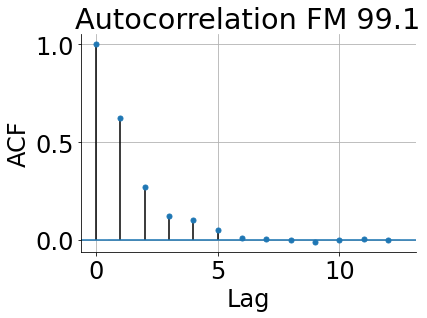

In [21]:
radio = FM.iloc[:400000,0]

plt.figure(figsize=(20,6))
plot_acf(np.abs(radio).values , lags = 12)
plt.title('Autocorrelation FM 99.1')
plt.ylabel("ACF")
plt.xlabel('Lag')
sns.despine()
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

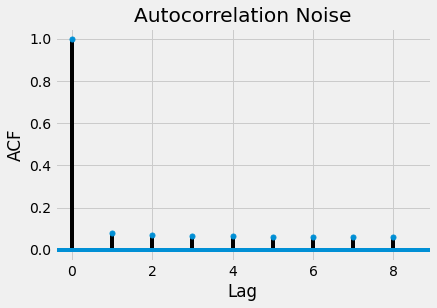

In [ ]:
nois = Noise.iloc[:400000,0]

plot_acf(np.abs(nois).values , lags = 8)
plt.title('Autocorrelation Noise')
plt.ylabel("ACF")
plt.xlabel('Lag')
plt.grid(True)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

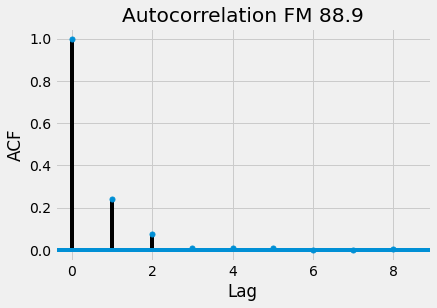

In [ ]:
fm883 = FM_88.iloc[:400000,0]

plot_acf(np.abs(fm883).values , lags = 8)
plt.title('Autocorrelation FM 88.9')
plt.ylabel("ACF")
plt.xlabel('Lag')
plt.grid(True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

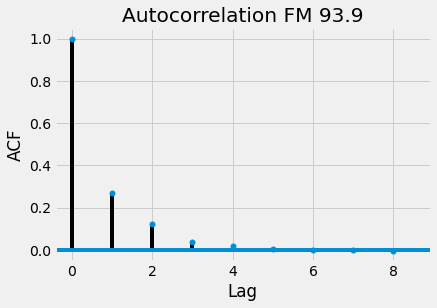

In [ ]:
FM932 = FM_93.iloc[:400000,0]

plot_acf(np.abs(FM932).values , lags = 8)
plt.title('Autocorrelation FM 93.9')
plt.ylabel("ACF")
plt.xlabel('Lag')
plt.grid(True)
plt.show

##  $$ \textbf{Why Would You Need the Fourier Transform?} $$
* The Fourier transform is useful in many applications. For example, Shazam and other music identification services use the Fourier transform to identify songs. JPEG compression uses a variant of the Fourier transform to remove the high-frequency components of images. Speech recognition uses the Fourier transform and related transforms to recover the spoken words from raw audio.

* In general, you need the Fourier transform if you need to look at the frequencies in a signal. If working with a signal in the time domain is difficult, then using the Fourier transform to move it into the frequency domain is worth trying

In [13]:

ny0 = np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /sem_msg_3"), dtype=np.float32)#NO MESSAGE
fm991 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /teste.dat"), dtype=np.float32 ) 
fm889 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_88.9_a1"), dtype=np.float32 ) 
fm932 =  np.fromfile(open("/content/drive/MyDrive/Colab Notebook/AICT 1 /fm_93.9_a2"), dtype=np.float32 ) 
#freq = np.fft.fftfreq()
NOsignal = ny0[:3999]
Signal = fm991[:3999]
signal93 = fm932[:3999]
signal88 = fm889[:3999]

fourier= np.fft.fft(NOsignal) # FFT FROM THE NO SIGNAL DATASET
no = NOsignal.size
timestep = 1/ no
freqno = np.fft.fftfreq(no,d=timestep)
mascara = freqno > 0

fouriersignal= np.fft.fft(Signal) # FFT FROM THE NO SIGNAL DATASET
sig = Signal.size
timestep = 1/ sig
freqsign= np.fft.fftfreq(sig,d=timestep)
masksig = freqsign > 0

fouriersignal93= np.fft.fft(signal93) # FFT FROM THE NO SIGNAL DATASET
sig93 = signal93.size
timestep = 1/ sig93
freqsign93 = np.fft.fftfreq(sig93,d=timestep)
masksig93 = freqsign93 > 0

fouriersignal88= np.fft.fft(signal88) # FFT FROM THE NO SIGNAL DATASET
sig88 = signal88.size
timestep = 1/ sig88
freqsign88 = np.fft.fftfreq(sig88,d=timestep)
masksig88 = freqsign88 > 0


def plot(fig, title, cor , ls ,lw ,mark, x ,y): 
  plt.figure(figsize= tuple(fig))
  plt.title(str(title), size = 14, fontweight = 'bold')
  plt.plot(x,y, color = cor, linestyle =ls, linewidth =lw , marker =mark )
  sns.despine()
  plt.grid(True)
  plt.show




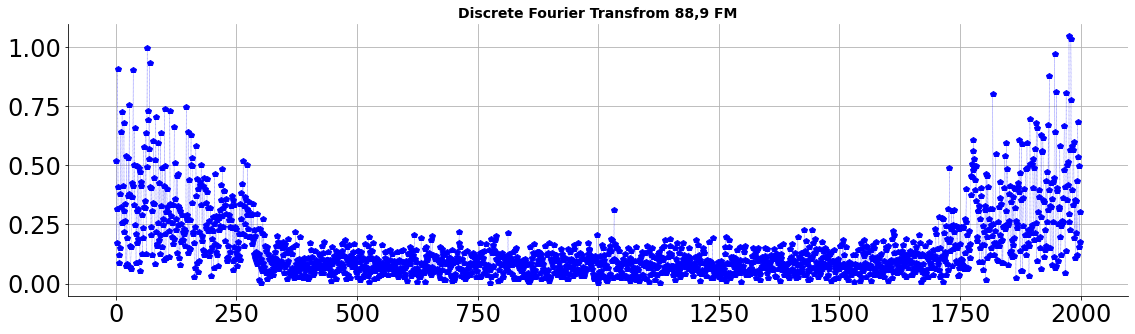

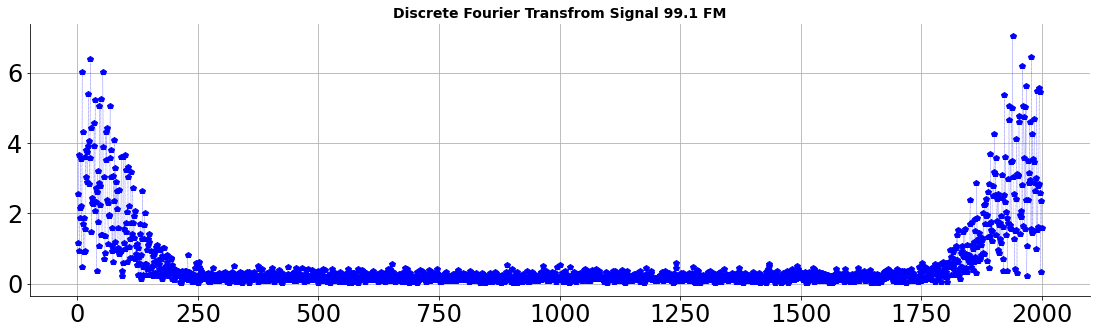

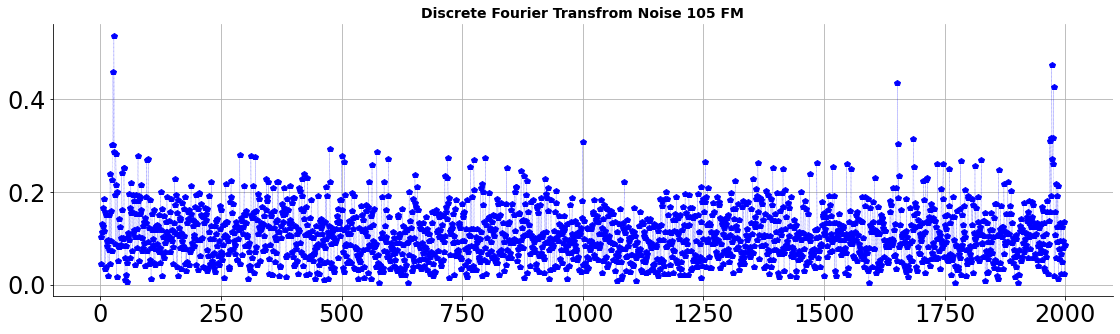

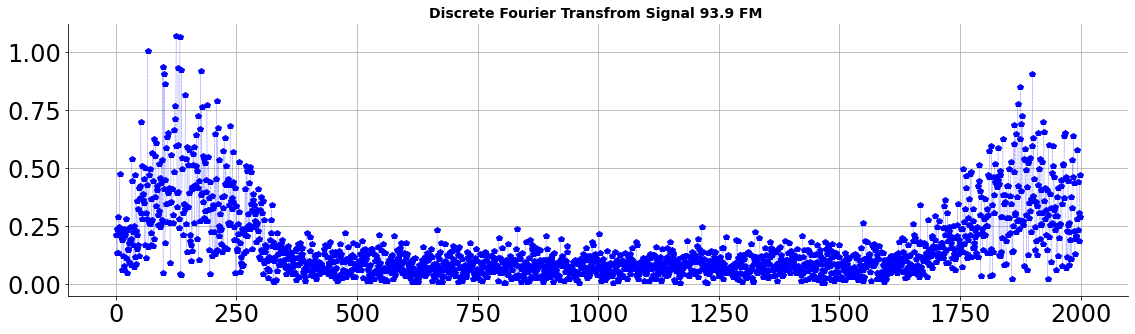

In [15]:
fig = (19,5)
plot(fig,"Discrete Fourier Transfrom 88,9 FM",cor = 'b',ls='dotted',
     lw =0.3,mark ='p', x=freqsign88[masksig88], y = np.abs(fouriersignal88[masksig88]))
fig = (19,5)
plot(fig,title ="Discrete Fourier Transfrom Signal 99.1 FM",cor = 'b',ls='dotted',
     lw =0.3,mark ='p', x=freqsign[masksig], y = np.abs(fouriersignal[masksig]))
plot(fig,title ="Discrete Fourier Transfrom Noise 105 FM",cor = 'b',ls='dotted',
     lw =0.3,mark ='p', x=freqno[mascara], y = np.abs(fourier[mascara]))
plot(fig,title ="Discrete Fourier Transfrom Signal 93.9 FM ",cor = 'b',ls='dotted',
     lw =0.3,mark ='p', x=freqsign93[masksig93], y = np.abs(fouriersignal93[masksig93]))



### Creating one dataset , which has signal and noise values

In [22]:
gnu = pd.concat([FM,Noise]).reset_index()
#gnu= gnu.drop(columns=['index'])
gnu  

,index,sinal1,sinal2,Signal
0,0,-0.000106,0.010624,1
1,1,-0.018708,0.016253,1
2,2,-0.024951,0.016560,1
3,3,-0.024644,0.018924,1
4,4,-0.023891,0.023842,1
...,...,...,...,...
1599995,799995,-0.002860,0.002546,0
1599996,799996,-0.002595,-0.003125,0
1599997,799997,-0.000719,0.002546,0
1599998,799998,-0.000719,-0.000984,0


In [23]:
signal = gnu[gnu['Signal'] ==1]# JUST THE ONE HAS SIGNAL
signal.head()

,index,sinal1,sinal2,Signal
0,0,-0.000106,0.010624,1
1,1,-0.018708,0.016253,1
2,2,-0.024951,0.016560,1
3,3,-0.024644,0.018924,1
4,4,-0.023891,0.023842,1


In [24]:
nosignal = gnu[gnu['Signal'] ==0] # NO SIGNAL
nosignal.head()

,index,sinal1,sinal2,Signal
800000,0,0.000159,0.002546,0
800001,1,0.000670,-0.000984,0
800002,2,0.002546,-0.003125,0
800003,3,-0.000984,-0.003125,0
800004,4,-0.003125,-0.000984,0


### $$ \textbf{Distance between each data related}  $$

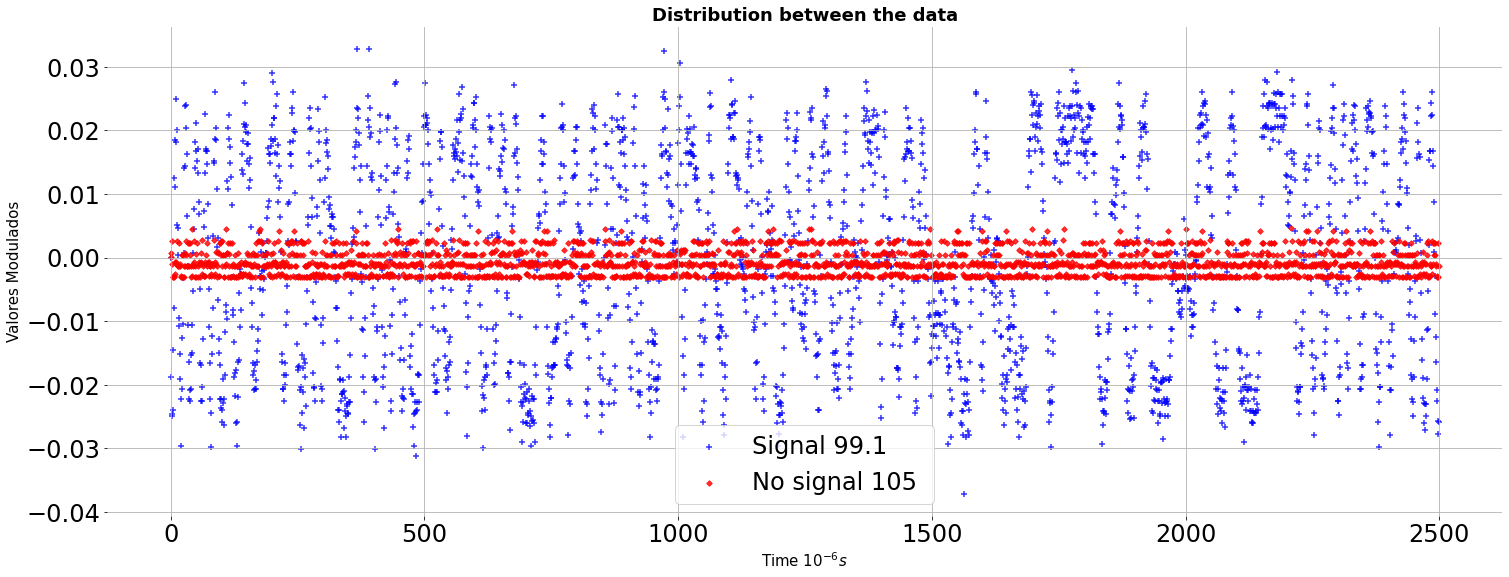

In [27]:
signal = signal[['index','sinal1']]
signal = signal.iloc[:2500]
nosignal = nosignal[['index','sinal1']]
nosignal = nosignal.iloc[:2500]
########################################
plt.figure(figsize = (25,9))

plt.title("Distribution between the data", fontweight='bold', size = 18)
plt.scatter(signal['index'], (signal['sinal1']), color = 'b', marker = "+", label = 'Signal 99.1', s =35, alpha = 0.8)
plt.scatter(nosignal['index'], (nosignal['sinal1']), color = 'r', marker = 'D',label = 'No signal 105 ', s = 15, alpha = 0.8)

plt.xlabel('Time $10^{-6} s$', size = 15)
plt.ylabel('Valores Modulados', size = 15)
plt.legend()

plt.grid(True)
sns.despine(left= True, bottom= True)

### $$ \textbf{Supervising Machine Learning algorithm} $$

* We are goint to slice the data between train and test , chosing our features and applying the knn method

In [ ]:
# Creating empy array to fill each columns with the dataset

FM_fourier0 = pd.DataFrame(np.abs(np.fft.fftn(fm991[:800000])),columns =['sinal1']).reset_index()
FM_fourier1 = pd.DataFrame(np.abs(np.fft.fftn(fm991[800000:1600000])),columns =['sinal2']).reset_index()

Noise_fourier0 = pd.DataFrame(np.abs(np.fft.fftn(noise[:800000])),columns =['sinal1']).reset_index()
Noise_fourier1 = pd.DataFrame(np.abs(np.fft.fftn(noise[800000:1600000])),columns =['sinal2']).reset_index()


In [ ]:
fm = pd.merge(FM_fourier0,FM_fourier1, how = 'inner').reset_index()
concat = pd.merge(Noise_fourier0,Noise_fourier1, how = 'inner').reset_index()
fm['Signal'] = 1
concat['Signal'] = 0
gnu = pd.merge(fm, concat, how = 'outer')


In [ ]:
X = gnu.iloc[:,2:4] # THE TRAINING DATASET
X 

,sinal1,sinal2
0,168.111163,177.950977
1,54.777201,67.316900
2,15.554240,17.921101
3,37.093574,13.957491
4,4.281271,27.724519
...,...,...
1599995,2.318576,2.184502
1599996,4.011886,0.719696
1599997,4.384269,4.141400
1599998,3.058993,4.481148


In [ ]:
y = gnu.iloc[:,4] # THE TARGET DATASET
y 

0          1
1          1
2          1
3          1
4          1
          ..
1599995    0
1599996    0
1599997    0
1599998    0
1599999    0
Name: Signal, Length: 1600000, dtype: int64


## *$$\textbf{Creating Train Test Split}$$*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.46,random_state= 100) # 46 % TO TEST 

print("lenght x train = {} \n lenght x test = {} " .format(len(X_train), len(X_test)))

lenght x train = 864000 
 lenght x test = 736000 


### *$$\textbf{Min Max Scaler}$$*
*$\textbf{Core of the method}$*
 > A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

*$\textbf{Why to normalize prior to model fitting?}$*
> The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

$$ x' =\frac{x -min(x)}{max(x) -min(x)}$$


In [ ]:
mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply

X_train = mm.fit_transform(X_train)
X_test = mm.transform(X_test)
#gnu0 = mm.fit_transform(df0)
#gnu1 = mm.fit_transform(df1)

In [ ]:
X_train

array([[0.032532  , 0.03046964],
       [0.01689661, 0.00941206],
       [0.30709156, 0.06466228],
       ...,
       [0.03197647, 0.02973334],
       [0.01059712, 0.03050154],
       [0.00489917, 0.02179803]])

In [ ]:
X_test 

array([[0.01085165, 0.0072085 ],
       [0.05262577, 0.02379243],
       [0.03386481, 0.00681994],
       ...,
       [0.01533411, 0.01132767],
       [0.0371223 , 0.00879806],
       [0.02139277, 0.01637509]])

### $$\textbf{Creating KNN = ( K Neighrest Neighbour Classifier )}$$

#### **metric** str or callable, default=’minkowski’
* Metric to use for distance computation. Default is “minkowski”, which results in the standard Euclidean distance when p = 2. 
* for 'euclidean' , we have $$\sqrt{\sum_{i}^{n}(x_i - y_i)^{2}}$$ 

* for 'manhattan' , we have $$ \sum_{i}^{n} |x_i - y_i| $$ , Manhattan Distance 
* for 'minkowski' , we have $$\sqrt[M]{\sum_{i}^{n}|x_i - y_i|^{M}}$$ 

>A distance measure that is a generalization of other distances, such as the Euclidean and Manhattan distances. It consists of extracting the modulus of the difference between each number of coordinates or the result at any end, performing a sum of all the terms and, by taking the mth root, where m is one. The Euclidean distance is a separate case when m is equal to 2 and the Manhattan distance is a separate case when m is equal to 1.

* for 'chebyshev' , we have  $$ máx{\sum_{i}^{n}|x_i - y_i|} $$ 
> It is a measure of distance that considers only the maximum value between the modules of the differences between the variables. Thus, it takes into account only the variable that has the greatest difference in values ​​between the two observations.


##### **weights**{‘uniform’, ‘distance’} or callable, default=’uniform’

* uniform’ : uniform weights. All points in each neighborhood are weighted equally.
* ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
* [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

#### Types of Knn method
* KNN Classifier = chooses the same class as most of the 'n' nearest neighbors of the data to be sorted
* KNN Regressor = choose the average of the label of the 'n' neighbors

### Number of K, how do we choose ?
* $\sqrt{n}$ , where n can be number of data points
* Odd value of K is selected to avoid confusion between two classes of data
* By choosing smaller number, you can find yourself not much accurate, by chossing larger number , the classification may be tend to the label with more frequence

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 9,weights='distance', p=2 , leaf_size=50)
KNN = KNeighborsClassifier()
knn_model =knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier(leaf_size=50, n_neighbors=9, weights='distance')

### $$\text{Types of measurements explored}$$
* Mean Absolute Error - MAE
The mean absolute error, MAE (from the acronym in English Mean Absolute Error), is based on the average of the absolute errors, that is, the module of each error used to avoid an underestimation, because the value is smaller by extreme points. (outliers).

Each error, can be interpreted as the difference between Y and Ŷ and thus, we have:
$$ MAE = \frac{1}{n}\sum_{i}^{n}|y_i test - y_ipred |$$

* Mean Square Error - MSE

The quadratic, MSE (Mean Squared Error), is commonly used to verify the accuracy of and gives greater weight to the largest models, since, when calculating errors, each error is squared and this is the penalty for errors. larger, after that, to these squared errors is average
$$ MSE = \frac{1}{n}\sum_{i}^{n}(y_i test - y_ipred )^{2}$$

* Square Root of Mean Error - RMSE
The Root Mean Squared Error (RMSE) is just the square root of the MSE, where the error returns to the model's unit of measure (in MSE, the unit of measure is quadratic).

It is often used in time series as it is more sensitive to larger errors due to the quadrature process it has produced.

$$ RMSE = \sum_{i}^{n}\frac{(y_i test - y_ipred)^{2}}{n}$$

## $$\textbf{Fourier module training} $$

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt


In [ ]:
def metric_simple(model):

  train_preds = model.predict(X_train)
  mse_1 = mean_squared_error(y_train, train_preds)
  rmse_train = sqrt(mse_1)


  test_preds = model.predict(X_test)
  mse_2 = mean_squared_error(y_test, test_preds)
  rmse_test = sqrt(mse_2)


  metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':model.score(X_test,y_test)
          ,'Accuracy':accuracy_score(y_test,test_preds),'F1_Score':f1_score(y_test,test_preds),
          'Recall':recall_score(y_test,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
  return pd.DataFrame([metrics])


In [ ]:
metric_simple(knn_model)

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.506709,0.743246,0.743246,0.754681,0.789893


## $$\text{How the score number was calculated} $$?

* Accuracy = $$\frac{True Positive (TP) + False Positive (FP)}{Total} $$

is the number of hits in our model divided by the total sample.

* Precision = $$\frac{True Positive (TP) }{True Positive (TP) + False Positive (FP)} $$

of all the data classified as positive, how many are actually positive.

* Recall = $$\frac{True Positive (TP) }{True Positive (TP) + False Negative (FP)} $$

what is the percentage of data classified as positive compared to the actual number of positives that exist in our sample.


* F1_Score = $$\frac{2}{\frac{1}{Precision} + \frac{1}{Recall}}$$

this metric combines precision and recall in order to bring a single number that determines the overall quality of our model

### $$ \textbf{Cross-Validation} $$
Cross-validation is a technique for evaluating the generalizability of a model from a set of data. This technique is widely used in problems where the modeling objective is prediction.Is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments:

* The snippet below divides the dataset into 10 subsets (folds)
* Then it will train the knn model 10 times
*For each execution, a different fold will be selected
* The result is an array with the evaluation of 10 scores


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# The results were not so good now
# Cross-validation lets you see beyond average performance,
# see also how accurate this is (standard deviation)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
pd.DataFrame(display_scores(tree_rmse_scores))

Scores: [0.64492163 0.64082148 0.64202888 0.64157373 0.64268459 0.64339242
 0.64275858 0.64514281 0.64409947 0.64194423]
Mean: 0.6429367814442001
Standard deviation: 0.0013639221253871777


""



## **$$ \textbf{Improving KNN  Random Search} $$**

>When the number of possible options is very large, it is better to randomize, using RandomizedSearchCV

* When the number of possible options is very large, it is better to randomize
* It is similar to GridSearch, but without testing all possible alternatives, but without testing all possible alternatives, This can be accomplished using a RandomizedSearchCV class

>With the GridSearchCV or RandomSearchCV estimator, the parameters need to be specified explicitly.Exploring a large number of values for different parameters will be quickly untractable.Instead, we can randomly generate the parameter candidates. Indeed, such approach avoids the regularity of the grid.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {'n_neighbors': [5,7,9,13,15,17,19,21],
                         'weights': ['uniform', 'distance'], 'metric':['chebyshev','minkowski','manhattan','euclidean'] 
             }
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

randomsearch = RandomizedSearchCV(KNN, param_distributions=parameters,
                                n_iter=10, cv=7, scoring='neg_mean_squared_error', 
                                random_state=100, return_train_score=True)


In [ ]:
randomsearch = randomsearch.fit(X_train, y_train)
randomsearch

RandomizedSearchCV(cv=7, estimator=KNeighborsClassifier(),
                   param_distributions={'metric': ['chebyshev', 'minkowski',
                                                   'manhattan', 'euclidean'],
                                        'n_neighbors': [5, 7, 9, 13, 15, 17, 19,
                                                        21],
                                        'weights': ['uniform', 'distance']},
                   random_state=100, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [ ]:
parms_random_estimator = randomsearch.best_params_
parms_random_estimator

{'weights': 'distance', 'n_neighbors': 21, 'metric': 'euclidean'}

In [ ]:
randomsearch.best_score_

-0.2542870358421886

In [ ]:
randomsearch.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=21, weights='distance')

In [ ]:
# Here we can sure the mean test score for each randon interaction by RandomSearchCV
cvres = randomsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.783093490125372 {'weights': 'uniform', 'n_neighbors': 7, 'metric': 'chebyshev'}
0.7632182390885278 {'weights': 'uniform', 'n_neighbors': 13, 'metric': 'euclidean'}
0.8198107015024989 {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'minkowski'}
0.8195412862007498 {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'chebyshev'}
0.7597834107177819 {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'minkowski'}
0.754155150124515 {'weights': 'uniform', 'n_neighbors': 19, 'metric': 'manhattan'}
0.7599506526574836 {'weights': 'uniform', 'n_neighbors': 15, 'metric': 'chebyshev'}
0.7515442403123154 {'weights': 'uniform', 'n_neighbors': 21, 'metric': 'minkowski'}
0.7566028768479859 {'weights': 'uniform', 'n_neighbors': 17, 'metric': 'chebyshev'}
0.8198107015024989 {'weights': 'uniform', 'n_neighbors': 3, 'metric': 'euclidean'}
0.8702286569979479 {'weights': 'distance', 'n_neighbors': 15, 'metric': 'manhattan'}
0.870290898622533 {'weights': 'distance', 'n_neighbors': 17, 'metric': 'minkowski

In [ ]:
results = pd.DataFrame(randomsearch.cv_results_).sort_values("mean_test_score", ascending=False)
results_p0 = results[results['param_metric']=='manhattan'] 
results_p1 = results[results['param_metric']=='euclidean'] 
results_p2 = results[results['param_metric']=='minkowski'] 
results_p3 = results[results['param_metric']=='chebyshev'] 
results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_metric,params,split0_test_score,split1_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
9,0.627900,0.019755,1.184805,0.044694,distance,21,euclidean,"{'weights': 'distance', 'n_neighbors': 21, 'me...",-0.255669,-0.255288,...,1,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
8,0.625421,0.002261,1.051175,0.025170,distance,17,chebyshev,"{'weights': 'distance', 'n_neighbors': 17, 'me...",-0.261033,-0.260547,...,2,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
0,0.630386,0.009232,1.214785,0.036797,distance,15,manhattan,"{'weights': 'distance', 'n_neighbors': 15, 'me...",-0.263431,-0.262564,...,3,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0


Text(0.5, 1.0, 'Performance vs Number of K , Euclidean Distance ')

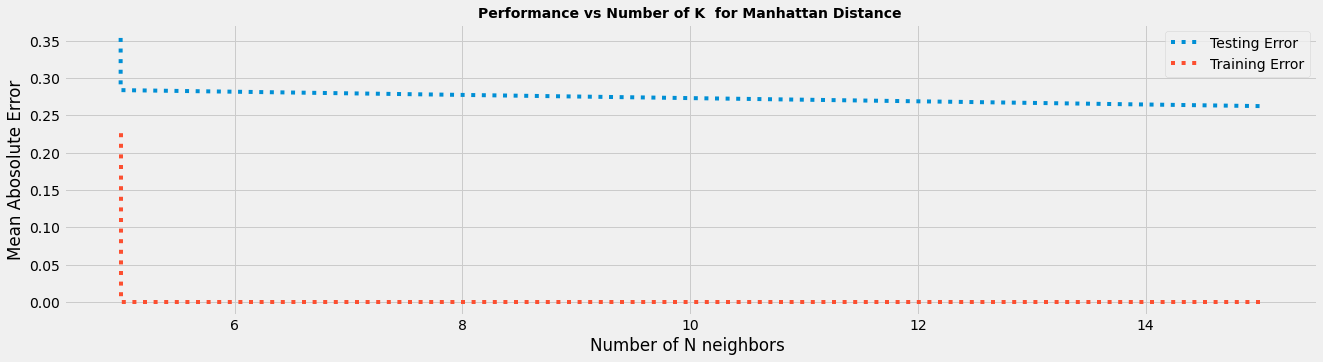

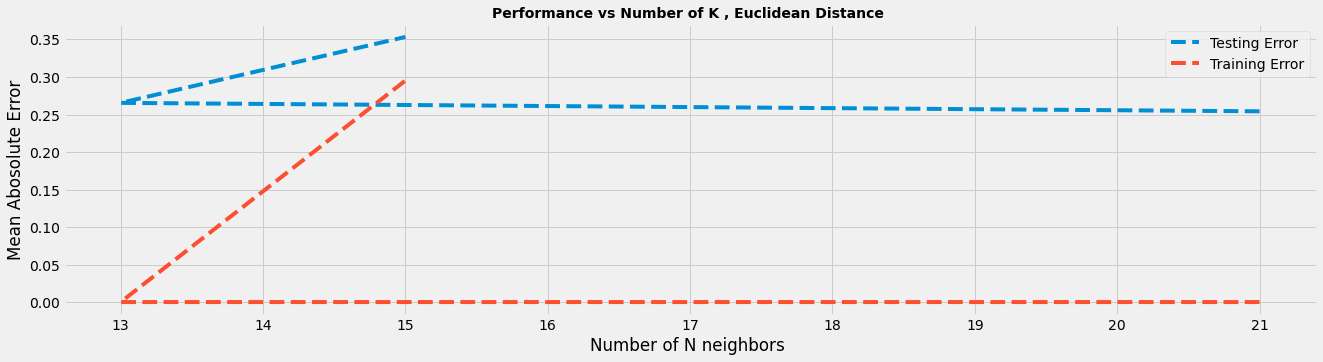

In [ ]:
import seaborn as sns
# No warnings about setting value on copy of slice

plt.figure(figsize=(20,5))

plt.plot(results_p0["param_n_neighbors"], np.abs(results_p0["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_p0["param_n_neighbors"], np.abs(results_p0["mean_train_score"]), label = "Training Error", linestyle= 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K  for Manhattan Distance",size = 14, fontweight='bold')

plt.figure(figsize=(20,5))

plt.plot(results_p1["param_n_neighbors"], np.abs(results_p1["mean_test_score"]), label = "Testing Error", linestyle = '--')
plt.plot(results_p1["param_n_neighbors"], np.abs(results_p1["mean_train_score"]), label = "Training Error", linestyle = '--')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K , Euclidean Distance ", size = 14, fontweight='bold')






Text(0.5, 1.0, 'Performance vs Number of K , Chebyshev Distance ')

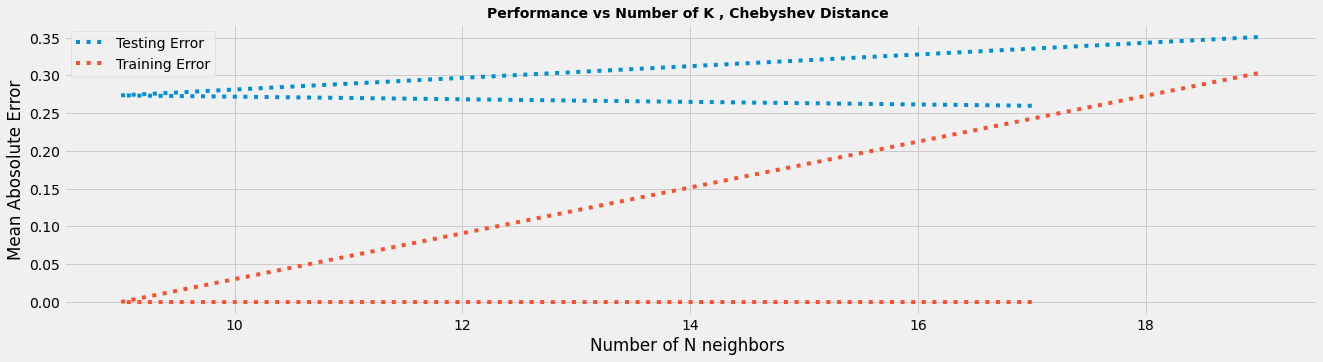

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(results_p3["param_n_neighbors"], np.abs(results_p3["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_p3["param_n_neighbors"], np.abs(results_p3["mean_train_score"]), label = "Training Error", linestyle = 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K , Chebyshev Distance ", size = 14, fontweight='bold')

In [ ]:
metric_simple(randomsearch)

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.486061,-0.236255,0.763745,0.766551,0.7758


## $$\textbf{Confidence Interval} $$

In [ ]:
# At this time, you may not feel confident to use it in the real world, as
# doesn't know if the result is reliable. For this, the 95% confidence interval must be computed.
# This test will allow you to assess whether the range is reasonable for your application

from scipy import stats

confidence = 0.95
squared_errors = (randomsearch.predict(X_test) - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.48506183, 0.4870584 ])

#### $$\textbf{Improving RandomSearch using GridSearchCV}$$

>>So far we've used k =3 in kNN, but let's use GridSearchCV to find the best value for K .
When you use near neighbors, you have a much more variable prediction than you will use more neighbors:
* If you use only one neighbor, a forecast may change mainly from one point to another. When you think of your own neighbors, one may be quite different from the others. If you lived near a 1-N forecast outlier your right house.
* If you have multiple data points, the impact of an extremely different neighbor will be much smaller.
* If you use next risks, a prediction of each point risks being too close. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)


parameters = {'leaf_size': [3,5,9,15,19],
              'n_jobs' : [-1],
              'algorithm':['auto', 'kd_tree'],
              'weights': ['uniform','distance']
             }
        
gridsearch = GridSearchCV( randomsearch.best_estimator_, 
                           param_grid= parameters,
                           cv = 2 ,  
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True )
                              

In [ ]:
grid = gridsearch.fit(X_train, y_train)
grid

Fitting 2 folds for each of 20 candidates, totalling 40 fits


GridSearchCV(cv=2,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=21,
                                            weights='distance'),
             n_jobs=-1,
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [3, 5, 9, 15, 19], 'n_jobs': [-1],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
grid.best_params_


{'algorithm': 'auto', 'leaf_size': 3, 'n_jobs': -1, 'weights': 'distance'}

In [ ]:
results_grid = grid.cv_results_

results_grid = pd.DataFrame(results_grid).sort_values("mean_test_score", ascending=False)

results_grid.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_jobs,param_weights,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
19,0.596693,0.063352,5.297880,0.125452,kd_tree,19,-1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 19, 'n_j...",-0.300438,-0.30063,-0.300534,0.000096,1,-0.0,-0.0,0.0,0.0
13,0.796386,0.183055,6.052457,0.221568,kd_tree,5,-1,distance,"{'algorithm': 'kd_tree', 'leaf_size': 5, 'n_jo...",-0.300438,-0.30063,-0.300534,0.000096,1,-0.0,-0.0,0.0,0.0
3,0.693000,0.062363,6.556056,0.059784,auto,5,-1,distance,"{'algorithm': 'auto', 'leaf_size': 5, 'n_jobs'...",-0.300438,-0.30063,-0.300534,0.000096,1,-0.0,-0.0,0.0,0.0


In [ ]:
# A variavel best_estimator_ apresenta o melhor modelo com seus parametros
best_estimator = grid.best_estimator_
best_estimator


KNeighborsClassifier(leaf_size=3, metric='euclidean', n_jobs=-1, n_neighbors=21,
                     weights='distance')

#### Plot comparing how good our model learning the data

Text(0.5, 1.0, 'Performance vs Number of leaf size for Manhatam Distance')

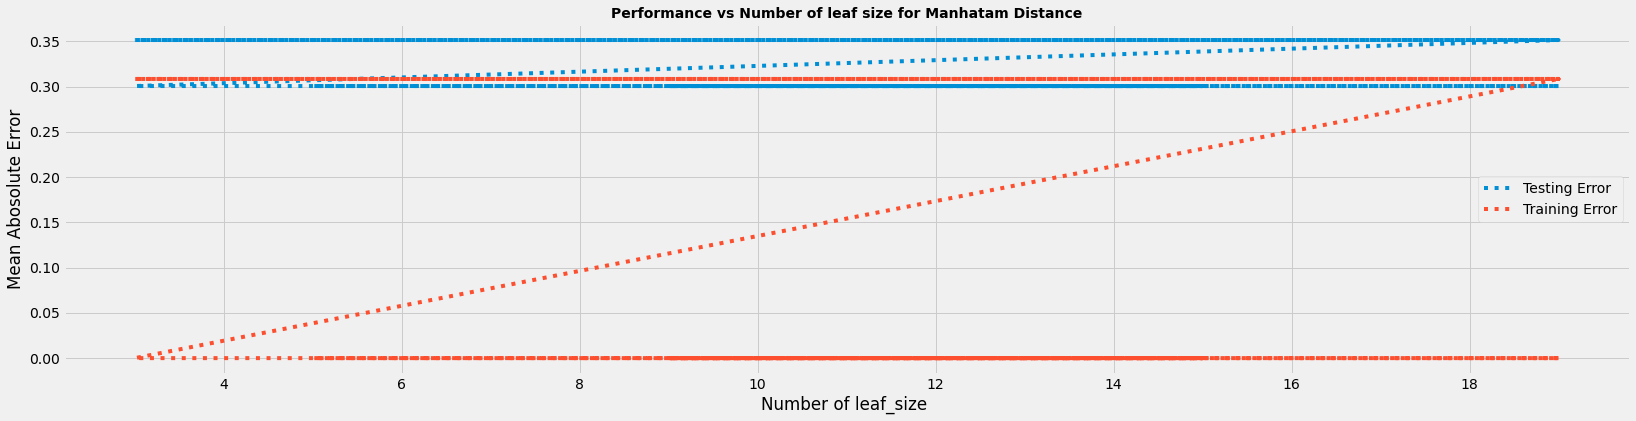

In [ ]:
# No warnings about setting value on copy of slice


plt.figure(figsize=(25,6))

plt.plot(results_grid["param_leaf_size"], np.abs(results_grid["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results_grid["param_leaf_size"], np.abs(results_grid["mean_train_score"]), label = "Training Error", linestyle= 'dotted')
plt.xlabel("Number of leaf_size "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of leaf size for Manhatam Distance",size = 14, fontweight='bold')




In [ ]:
metric_simple(grid)

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.486061,-0.236255,0.763745,0.766551,0.7758


### **$$\textbf{Confusion Matrix}$$**

>In the field of Machine Learning, a confusion matrix is ​​a table that allows the visualization of the performance of a classification algorithm. This special 2x2 contingency table is also called an error matrix.

* Compute confusion matrix to evaluate the accuracy of a classification.
* By definition a confusion matrix *C* is such that $C\small{i,j}*$ is equal to the number of observations known to be in group  and predicted to be in group $_j$  .



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,grid.predict(X_test))
cm

array([[276634,  91382],
       [ 82502, 285482]])

Text(70.66, 0.5, 'Truth')

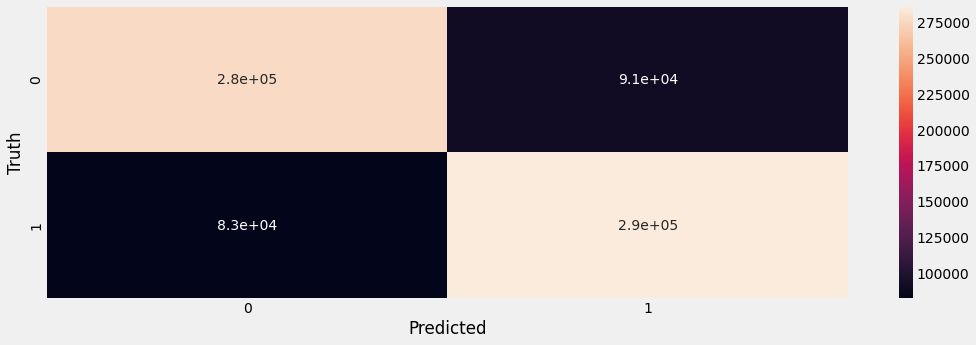

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')

>> A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True and how many are False. More specifically, True Positives, False Positives, True negatives and False Negatives are used to predict the metrics of a classification report as shown below

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76    368016
           1       0.76      0.78      0.77    367984

    accuracy                           0.76    736000
   macro avg       0.76      0.76      0.76    736000
weighted avg       0.76      0.76      0.76    736000



# $$ \textbf{Creating KNN model using 2 coordinates from real axis and imaginary by format a+bi} $$

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from math import sqrt


In [ ]:

variable = pd.DataFrame()
real = pd.DataFrame()
imag = pd.DataFrame()
sinais = [fm991, fm889, fm932, noise]

i = 0
for i in range(0,4):
  variable[i]= pd.DataFrame(np.fft.fftn(sinais[i]))
  real[i] = np.real(variable[i])
  imag[i]= np.imag(variable[i])
  i+=1


In [ ]:
real = pd.DataFrame(real)
imag = pd.DataFrame(imag)
real = real.dropna().rename(columns = { 0 :"FM991_real",1 :"FM889_real",2:"FM932_real",3:'NOISE_real'}).reset_index()
imag = imag.dropna().rename(columns = { 0 :"FM991_imag",1 :"FM889_imag",2:"FM932_imag",3:'NOISE_imag'}).reset_index()
real

,index,FM991_real,FM889_real,FM932_real,NOISE_real
0,0,-5559.539827,-554.750670,-251.455714,-1485.767962
1,1,47.411131,-18.079235,-18.041449,-13.846336
2,2,176.271277,-41.005905,1.413756,-4.365619
3,3,112.706652,-25.046268,-2.853567,4.403332
4,4,155.391010,-13.731271,-2.482444,-2.731570
...,...,...,...,...,...
1867259,1867259,1.838123,-1.510411,-1.980195,-0.284080
1867260,1867260,6.149054,0.481007,-0.150742,0.265585
1867261,1867261,-30.886627,1.013879,4.457665,-1.008979
1867262,1867262,20.266227,-3.058241,-4.288679,-3.823546


In [ ]:
imag

,index,FM991_imag,FM889_imag,FM932_imag,NOISE_imag
0,0,0.000000,0.000000,0.000000,-1529.248014
1,1,-76.626162,-19.233398,-10.048148,-12.166835
2,2,-152.986543,4.064759,-0.909451,-6.091625
3,3,-233.243522,38.573615,-5.719899,1.145403
4,4,285.526411,-28.542110,4.880888,1.408917
...,...,...,...,...,...
23396347,23396347,20.263516,0.000000,0.000000,0.000000
23396348,23396348,-285.526411,0.000000,0.000000,0.000000
23396349,23396349,233.243522,0.000000,0.000000,0.000000
23396350,23396350,152.986543,0.000000,0.000000,0.000000


In [ ]:
FM991 = pd.DataFrame()
FM991 = pd.merge(real[['index','FM991_real']], imag[['index','FM991_imag']], how ='inner')
FM991 = FM991 [FM991['index'] < 80000]
FM991['Signal'] =1 

ruido = pd.DataFrame()
ruido = pd.merge(real[['index','NOISE_real']], imag[['index','NOISE_imag']], how ='inner')
ruido = ruido [ruido['index'] < 80000]
ruido['Signal'] =0

FM88 = pd.DataFrame()
FM88 = pd.merge(real[['index','FM889_real']], imag[['index','FM889_imag']], how ='inner')
FM88 = FM88 [FM88['index'] < 80000]
FM88['Signal'] =1 

FM93 = pd.DataFrame()
FM93 = pd.merge(real[['index','FM932_real']], imag[['index','FM932_imag']], how ='inner')
FM93 = FM93 [FM93['index'] < 80000]
FM93['Signal'] =1 




In [ ]:
ruido.head()

,index,NOISE_real,NOISE_imag,Signal
0,0,-1485.767962,-1529.248014,0
1,1,-13.846336,-12.166835,0
2,2,-4.365619,-6.091625,0
3,3,4.403332,1.145403,0
4,4,-2.731570,1.408917,0


In [ ]:
FM93.head()

,index,FM932_real,FM932_imag,Signal
0,0,-251.455714,0.000000,1
1,1,-18.041449,-10.048148,1
2,2,1.413756,-0.909451,1
3,3,-2.853567,-5.719899,1
4,4,-2.482444,4.880888,1


In [ ]:
FM88.head()

,index,FM889_real,FM889_imag,Signal
0,0,-554.750670,0.000000,1
1,1,-18.079235,-19.233398,1
2,2,-41.005905,4.064759,1
3,3,-25.046268,38.573615,1
4,4,-13.731271,-28.542110,1


In [ ]:
FM93.head()

,index,FM932_real,FM932_imag,Signal
0,0,-251.455714,0.000000,1
1,1,-18.041449,-10.048148,1
2,2,1.413756,-0.909451,1
3,3,-2.853567,-5.719899,1
4,4,-2.482444,4.880888,1


In [ ]:
FM991 = FM991.rename(columns = {'FM991_real':'Real','FM991_imag':'Imag'})
ruido = ruido.rename(columns={'NOISE_real':'Real', 'NOISE_imag':'Imag'})

FM93 = FM93.rename(columns = {'FM932_real':'Real','FM932_imag':'Imag'})
FM88 = FM88.rename(columns={'FM889_real':'Real', 'FM889_imag':'Imag'})

In [ ]:
signalsFM99 = pd.merge(FM991, ruido, how = 'outer')
signalsFM93 = pd.merge(FM93, ruido, how = 'outer')
signalsFM88 = pd.merge(FM88, ruido, how = 'outer')
signalsFM99


,index,Real,Imag,Signal
0,0,-5559.539827,0.000000,1
1,1,47.411131,-76.626162,1
2,2,176.271277,-152.986543,1
3,3,112.706652,-233.243522,1
4,4,155.391010,285.526411,1
...,...,...,...,...
159995,79995,-4.945718,-0.736901,0
159996,79996,-3.292130,-2.471686,0
159997,79997,-0.538853,0.420607,0
159998,79998,3.283206,-2.612908,0


In [ ]:
signalsFM93

,index,Real,Imag,Signal
0,0,-251.455714,0.000000,1
1,1,-18.041449,-10.048148,1
2,2,1.413756,-0.909451,1
3,3,-2.853567,-5.719899,1
4,4,-2.482444,4.880888,1
...,...,...,...,...
159995,79995,-4.945718,-0.736901,0
159996,79996,-3.292130,-2.471686,0
159997,79997,-0.538853,0.420607,0
159998,79998,3.283206,-2.612908,0


In [ ]:
signalsFM88

,index,Real,Imag,Signal
0,0,-554.750670,0.000000,1
1,1,-18.079235,-19.233398,1
2,2,-41.005905,4.064759,1
3,3,-25.046268,38.573615,1
4,4,-13.731271,-28.542110,1
...,...,...,...,...
159995,79995,-4.945718,-0.736901,0
159996,79996,-3.292130,-2.471686,0
159997,79997,-0.538853,0.420607,0
159998,79998,3.283206,-2.612908,0


In [ ]:
X_FM99 = signalsFM99.iloc[:,1:3] 
y_FM99 = signalsFM99.iloc[:,3]  

X_FM88 = signalsFM88.iloc[:,1:3] 
y_FM88 = signalsFM88.iloc[:,3]  

X_FM93 = signalsFM93.iloc[:,1:3] 
y_FM93 = signalsFM93.iloc[:,3]  


In [ ]:
X_train_FM93, X_test_FM93, y_train_FM93, y_test_FM93 = train_test_split(X_FM93,y_FM93,test_size = 0.26,random_state = 50) 
X_train_FM99, X_test_FM99, y_train_FM99, y_test_FM99 = train_test_split(X_FM99,y_FM99,test_size = 0.26, random_state = 50) 
X_train_FM88, X_test_FM88, y_train_FM88, y_test_FM88 = train_test_split(X_FM88,y_FM88,test_size = 0.26,random_state = 50) 


In [ ]:
train_test_split_ = {"FM 99.1": [len(X_train_FM99), len(X_test_FM99),len(y_train_FM99), len(y_test_FM99)],
                    "FM 88.1": [len(X_train_FM88), len(X_test_FM88),len(y_train_FM88), len(y_test_FM88)],
                    "FM 93.2": [len(X_train_FM93), len(X_test_FM93),len(y_train_FM93), len(y_test_FM93)]}
train_test_split_ = pd.DataFrame(data=train_test_split_, index=["X train", "X test", "y Train", "y Test"])
train_test_split_

,FM 99.1,FM 88.1,FM 93.2
X train,118400,118400,118400
X test,41600,41600,41600
y Train,118400,118400,118400
y Test,41600,41600,41600


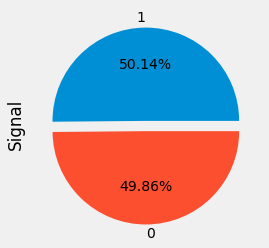

In [ ]:
y_test_FM88.value_counts(normalize=True).plot.pie(autopct = "%0.2f%%", explode = [0.03, 0.08])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range=(0, 1)) # doing the reshape to make easier to aour method apply

X_train_FM99 = mm.fit_transform(X_train_FM99)
X_test_FM99 = mm.transform(X_test_FM99) 

X_train_FM88 = mm.fit_transform(X_train_FM88)
X_test_FM88 = mm.transform(X_test_FM88)

X_train_FM93 = mm.fit_transform(X_train_FM93)
X_test_FM93 = mm.transform(X_test_FM93)

## $$\textbf{KNN Construction} $$

> * Firstly , we are going to apply the method only using FREQUENCE FM 99,1 to realize the accuracy and the best estimator and params
>* Secondly, by using the train data from FM 99,1 , we are going to test on other frequence to realize the accuracy and compare how good the method is.

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 7,weights='distance', p=2)
KNN = KNeighborsClassifier()

knn_fit99 = knn.fit(X_train_FM99,y_train_FM99)
knn_fit88 = knn.fit(X_train_FM88,y_train_FM88)
knn_fit93 = knn.fit(X_train_FM93,y_train_FM93)

In [ ]:
knn_fit93

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:

# FM88
 
def metrics (model):

  final_predictions_train_fm88 = model.predict(X_train_FM88)
  train_mse_fm88 = mean_squared_error(y_train_FM88, final_predictions_train_fm88)
  train_rmse_fm88 = sqrt(train_mse_fm88)
  final_predictions_test_fm88 = model.predict(X_test_FM88)
  test_mse_fm88 = mean_squared_error(y_test_FM88, final_predictions_test_fm88)
  test_rmse_fm88 = sqrt(test_mse_fm88)


# FM93

  final_predictions_train_fm93 = model.predict(X_train_FM93)
  train_mse_fm93 = mean_squared_error(y_train_FM93, final_predictions_train_fm93)
  train_rmse_fm93 = sqrt(train_mse_fm93)
  final_predictions_test_fm93= model.predict(X_test_FM93)
  test_mse_fm93 = mean_squared_error(y_test_FM93, final_predictions_test_fm93)
  test_rmse_fm93 = sqrt(test_mse_fm93)

# FM99

  final_predictions_train_fm99 = model.predict(X_train_FM99)
  train_mse_fm99 = mean_squared_error(y_train_FM99, final_predictions_train_fm99)
  train_rmse_fm99 = sqrt(train_mse_fm99)
  final_predictions_test_fm99 = model.predict(X_test_FM99)
  test_mse_fm99 = mean_squared_error(y_test_FM99, final_predictions_test_fm99)
  test_rmse_fm99 = sqrt(test_mse_fm99)

# ALL SIGNAL

  sinais = {"Rmse Train": [train_rmse_fm99,train_rmse_fm93,train_rmse_fm88],
          
            "Rmse Test ":[test_rmse_fm99 ,test_rmse_fm93 ,test_rmse_fm88], 

        'Score':[model.score(X_test_FM99,y_test_FM99),model.score(X_test_FM93,y_test_FM93),
                model.score(X_test_FM88,y_test_FM88)],
          
        'Accuracy': [accuracy_score(y_test_FM99,final_predictions_test_fm99),accuracy_score(y_test_FM93,final_predictions_test_fm93),
                    accuracy_score(y_test_FM88,final_predictions_test_fm88) ],
          
        'F1_Score': [f1_score(y_test_FM99,final_predictions_test_fm99),f1_score(y_test_FM93,final_predictions_test_fm93),
                    f1_score(y_test_FM88,final_predictions_test_fm88) ],
          
        'Recall':[recall_score(y_test_FM99,final_predictions_test_fm99),recall_score(y_test_FM93,final_predictions_test_fm93),
                recall_score(y_test_FM88,final_predictions_test_fm88)]}

  return pd.DataFrame(data = sinais,index=["FM99", 'FM88','FM93']) 

## $$\textbf{Training FM 99} $$

In [ ]:
metrics(knn_fit99)

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
FM99,0.707453,0.706103,0.501418,0.501418,0.667926,1.000000
FM88,0.000000,0.394493,0.844375,0.844375,0.842650,0.831056
FM93,0.428276,0.425960,0.818558,0.818558,0.818050,0.813462


In [ ]:
metrics(knn_fit88)

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
FM99,0.706763,0.707501,0.499443,0.499443,0.666171,1.000000
FM88,0.000000,0.392040,0.846304,0.846304,0.844114,0.833184
FM93,0.427782,0.427820,0.816970,0.816970,0.816153,0.813433


In [ ]:
metrics(knn_fit93)

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
FM99,0.706763,0.707501,0.499443,0.499443,0.666171,1.000000
FM88,0.000000,0.392040,0.846304,0.846304,0.844114,0.833184
FM93,0.427782,0.427820,0.816970,0.816970,0.816153,0.813433


## $$ \textbf{Improving the model using RandomSearch.}$$
here, our focus is to plot the quality of train learning dataset facing the testing learning quality as well. Thus, we can make sure if was some overfitting or underfitting in our problem to solve this later.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV


parameters = {'n_neighbors': range(1,18,1),
                         'weights': ['uniform', 'distance'], 'p':[1,2]
             }

randomsearch = RandomizedSearchCV(KNN, param_distributions=parameters,
                                n_iter=8, cv=3, scoring='neg_mean_squared_error', 
                                random_state=42, return_train_score=True)



In [ ]:
randomsearch_fit99 = randomsearch.fit(X_train_FM99, y_train_FM99)
randomsearch_fit99

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=8,
                   param_distributions={'n_neighbors': range(1, 18),
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_squared_error')

In [ ]:
parms_random_estimator = randomsearch_fit99.best_params_
parms_random_estimator

{'weights': 'uniform', 'p': 2, 'n_neighbors': 15}

In [ ]:
cvres = randomsearch.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.07683564279066504 {'weights': 'uniform', 'p': 2, 'n_neighbors': 12}
0.07958932825695743 {'weights': 'uniform', 'p': 1, 'n_neighbors': 5}
0.08332206104344472 {'weights': 'uniform', 'p': 1, 'n_neighbors': 2}
0.08747585806435874 {'weights': 'distance', 'p': 1, 'n_neighbors': 3}
0.07900352510909468 {'weights': 'uniform', 'p': 1, 'n_neighbors': 8}
0.07953624205200081 {'weights': 'distance', 'p': 1, 'n_neighbors': 11}
0.07650516676261539 {'weights': 'uniform', 'p': 2, 'n_neighbors': 15}
0.09612420060247205 {'weights': 'distance', 'p': 1, 'n_neighbors': 2}


In [ ]:
results = pd.DataFrame(randomsearch.cv_results_).sort_values("mean_test_score", ascending=False)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_p,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
6,0.050360,0.000891,1.190782,0.025834,uniform,2,15,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 15}",-0.005954,-0.005752,-0.005853,-0.005853,0.000083,1,-0.005600,-0.005752,-0.005625,-0.005659,0.000067
0,0.050424,0.000363,1.200365,0.023778,uniform,2,12,"{'weights': 'uniform', 'p': 2, 'n_neighbors': 12}",-0.005954,-0.005878,-0.005878,-0.005904,0.000036,2,-0.005650,-0.005701,-0.005663,-0.005671,0.000022
4,0.050328,0.001316,1.158124,0.013264,uniform,1,8,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 8}",-0.006106,-0.006030,-0.006588,-0.006242,0.000247,3,-0.005574,-0.005714,-0.005612,-0.005633,0.000059
5,0.052118,0.003483,0.186487,0.001323,distance,1,11,"{'weights': 'distance', 'p': 1, 'n_neighbors':...",-0.006486,-0.006132,-0.006360,-0.006326,0.000147,4,-0.000000,-0.000000,-0.000000,0.000000,0.000000
1,0.049679,0.000483,1.191553,0.031974,uniform,1,5,"{'weights': 'uniform', 'p': 1, 'n_neighbors': 5}",-0.006562,-0.005904,-0.006537,-0.006334,0.000305,5,-0.005068,-0.005283,-0.005156,-0.005169,0.000088


#### Plot comparing how good our model learning the data

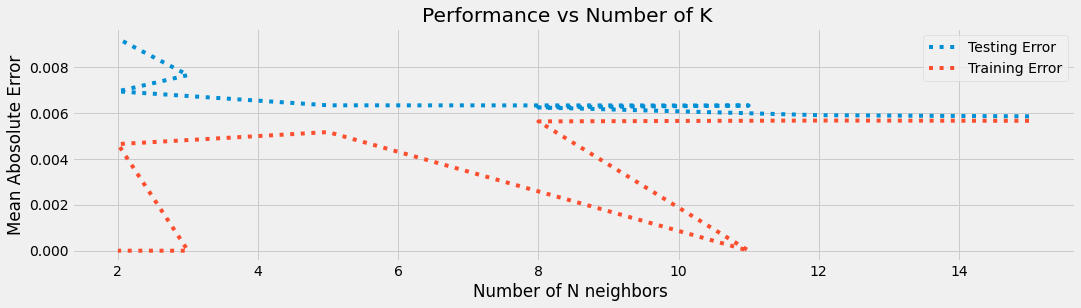

In [ ]:
import seaborn as sns
# No warnings about setting value on copy of slice

plt.figure(figsize=(16,4))
plt.plot(results["param_n_neighbors"], np.abs(results["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results["param_n_neighbors"], np.abs(results["mean_train_score"]), label = "Training Error",linestyle = 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K  ");

### $$ \textbf{Analysing the metrics evaluation by classifier methods} $$

In [ ]:
metric_simple(randomsearch_fit99)

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.707094,0.707122,-0.500022,0.499978,0.666647,1.0


## $$\textbf{Confusion Matrix - FM 99.1} $$

In [ ]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_FM99,randomsearch_fit99.predict(X_test_FM99))
cm



array([[159224,    723],
       [  1147, 158906]])

Text(70.66, 0.5, 'Truth')

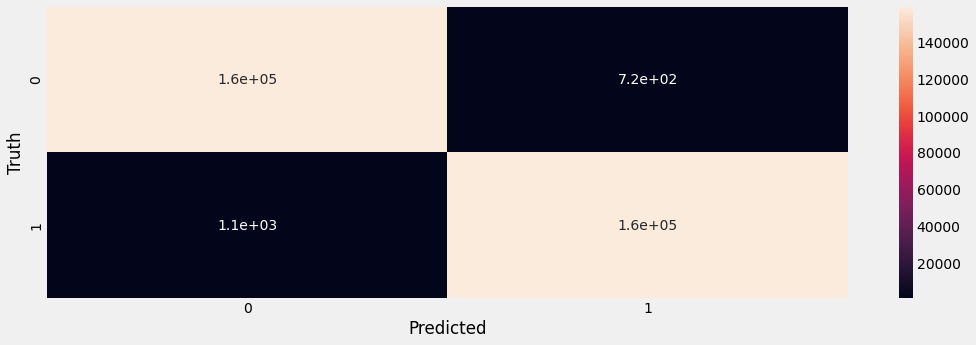

In [ ]:
import seaborn as sns
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot = True )
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_FM99,randomsearch_fit99.predict(X_test_FM99))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    159947
           1       1.00      0.99      0.99    160053

    accuracy                           0.99    320000
   macro avg       0.99      0.99      0.99    320000
weighted avg       0.99      0.99      0.99    320000



## $$\textbf{Training FM99.1 , Testing FM 88.1 - 93.1 } $$

In [ ]:

knn = KNeighborsClassifier(n_neighbors= 7,weights='distance', p=2, leaf_size=150)
KNN = KNeighborsClassifier()
knn_fit99 = knn.fit(X_train_FM99,y_train_FM99)
knn_fit88 = knn.fit(X_train_FM88,y_train_FM88)
knn_fit93 = knn.fit(X_train_FM93,y_train_FM93)

KNeighborsClassifier(leaf_size=150, weights='distance')

In [ ]:
metrics(knn_fit99)

## $$\textbf{Metrics on FM 88} $$

In [ ]:

train_preds = knn.predict(X_train_FM99)
mse_1 = mean_squared_error(y_train_FM99, train_preds)
rmse_train = sqrt(mse_1)

test_preds = knn.predict(X_test_FM88)
mse_2 = mean_squared_error(y_test_FM88, test_preds)
rmse_test = sqrt(mse_2)


metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test_FM88,y_test_FM88)
          ,'Accuracy':accuracy_score(y_test_FM88,test_preds),'F1_Score':f1_score(y_test_FM88,test_preds),
          'Recall':recall_score(y_test_FM88,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.585494,0.657196,0.657196,0.705798,0.824218


In [ ]:
metrics(knn_fit99)

## $$\textbf{Metrics on FM 93} $$

In [ ]:

train_preds = knn.predict(X_train_FM99)
mse_1 = mean_squared_error(y_train_FM99, train_preds)
rmse_train = sqrt(mse_1)

test_preds = knn.predict(X_test_FM93)
mse_2 = mean_squared_error(y_test_FM93, test_preds)
rmse_test = sqrt(mse_2)


metrics = {"RMSE TRAIN": rmse_train,"RMSE TEST":rmse_test,'Score':knn.score(X_test_FM93,y_test_FM93)
          ,'Accuracy':accuracy_score(y_test_FM93,test_preds),'F1_Score':f1_score(y_test_FM93,test_preds),
          'Recall':recall_score(y_test_FM93,test_preds)}
#THE ACCURACY TELL US HOW GOOD FIT THE MODEL WAS
metrics = pd.DataFrame([metrics])
metrics

,RMSE TRAIN,RMSE TEST,Score,Accuracy,F1_Score,Recall
0,0.0,0.504144,0.745839,0.745839,0.762304,0.816916


## $$\textbf{Improving using GridSearchCV} $$

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

parameters = { 'n_neighbors': range(0,25,1),
              'algorithm':['auto', 'kd_tree','brute'],
              'weights': ['uniform','distance'],
              'metric': [ 'manhattan', 'euclidean']
             }
        
gridsearch = RandomizedSearchCV(KNN, 
                           param_distributions= parameters,
                             cv = 3,  
                             n_iter=10,
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True )
                              

In [ ]:
gridsearch_fit99 = gridsearch.fit(X_train_FM99,y_train_FM99)
gridsearch_fit88 = gridsearch.fit(X_train_FM88,y_train_FM88)
gridsearch_fit93 = gridsearch.fit(X_train_FM93,y_train_FM93)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(), n_iter=15, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'kd_tree',
                                                      'ball_tree', 'brute'],
                                        'metric': ['manhattan', 'euclidean'],
                                        'n_neighbors': range(0, 25),
                                        'weights': ['uniform', 'distance']},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:

parms_random_estimator = gridsearch.best_params_
parms_random_estimator

{'weights': 'uniform',
 'n_neighbors': 19,
 'metric': 'manhattan',
 'algorithm': 'auto'}

In [ ]:
results = pd.DataFrame(gridsearch.cv_results_).sort_values("mean_test_score", ascending=False)

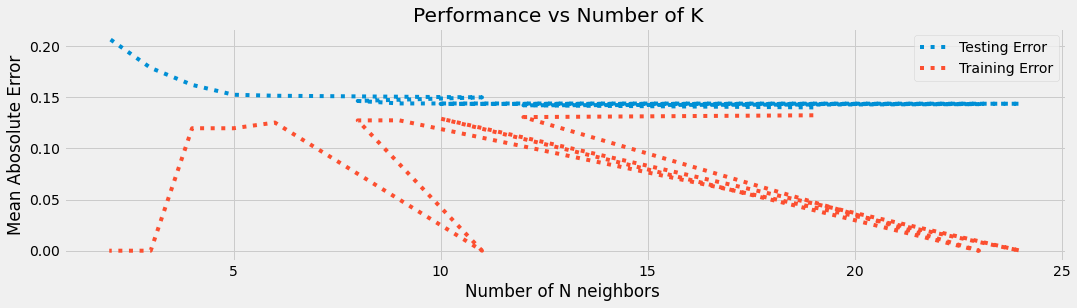

In [ ]:

plt.figure(figsize=(16,4))
plt.plot(results["param_n_neighbors"], np.abs(results["mean_test_score"]), label = "Testing Error", linestyle = 'dotted')
plt.plot(results["param_n_neighbors"], np.abs(results["mean_train_score"]), label = "Training Error",  linestyle = 'dotted')
plt.xlabel("Number of N neighbors "); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of K  ");

## $$\textbf{Final Predictions}$$

In [ ]:
metrics(gridsearch_fit99)

,Rmse Train,Rmse Test,Score,Accuracy,F1_Score,Recall
FM99,0.363939,0.374190,-0.140018,0.859982,0.856772,0.839430
FM88,0.483387,0.482368,-0.232679,0.767321,0.781500,0.834061
FM93,0.582856,0.580255,-0.336696,0.663304,0.714271,0.843546


In [ ]:
metrics(gridsearch_fit88)

In [ ]:
metrics(gridsearch_fit93)

## $$\textbf{Report : FM 88}$$

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_FM88, gridsearch.predict(X_train_FM88))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59     28062
           1       0.62      0.84      0.71     27938

    accuracy                           0.66     56000
   macro avg       0.69      0.66      0.65     56000
weighted avg       0.69      0.66      0.65     56000



## $$\textbf{Report : FM 99}$$

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_FM88, gridsearch.predict(X_train_FM99))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86     28062
           1       0.87      0.84      0.86     27938

    accuracy                           0.86     56000
   macro avg       0.86      0.86      0.86     56000
weighted avg       0.86      0.86      0.86     56000



## $$\textbf{Report : FM 93}$$

In [ ]:
from sklearn.metrics import classification_report 
print(classification_report(y_test_FM88,gridsearch.predict(X_train_FM93)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     28062
           1       0.74      0.83      0.78     27938

    accuracy                           0.77     56000
   macro avg       0.77      0.77      0.77     56000
weighted avg       0.77      0.77      0.77     56000

